# GBApy: How to Use


In [1]:
import sys
# Add the local src directory to the path
sys.path.append('./src/')
from GBA_algorithms import *

### 1) Import/Create Models

To ensure that your models are loaded correctly and the simulation of evolution runs as expected, follow these steps:

#### 1.1) Folder Naming
Name the folder after your preferred model name. This is important because the folder name will be used as the model name in scripting.

#### 1.2) Model Structure
The model should consist of at least four different CSV files with the following format:

- `conditions.csv`
- `kcat.csv`
- `KM_forward.csv`
- `M.csv`

#### 1.3) Value Formatting
Ensure that all values are correctly formatted (e.g., no strings where a float value is expected, etc.).


### 2) Start Scripting

The `GBA_algorithms` class is the main class that we will use. It includes all the necessary functions for GBA, including the evolutionary algorithms.

#### 2.1) Load the Model
Create a `GBA_algorithms` object to load your model. Use your model name as the argument for the object creation.

#### 2.2) Calculate an Initial LP Solution
Calculate a first Linear Programming (LP) solution that satisfies the model's consistency:
- Density = 1
- Positive protein
- Positive concentrations

In [2]:
#2.1) load model modelName
model = GBA_algorithms("A")

#2.2) Calculate first LP solution
model.load_LP_initial_solution()

### 3) Run Algorithms

Now that we have successfully imported the model and loaded the first LP solution point while maintaining consistency, we can run our preferred algorithm to simulate cell growth and evolution. You can choose one of the following three algorithms:

#### 3.1) Gradient Ascent Without Noise
#### 3.2) Gradient Ascent With Noise
#### 3.3) Markov Chain Monte Carlo (MCMC)

- **3.1 and 3.2**: These algorithms are used to find the maximum growth rate of a model under a specific environmental condition, which you can set according to the `conditions.csv` file in your model folder.
- **3.3**: This algorithm simulates mutations in any random flux fraction or reaction the model contains.

We will now go through use cases for each function.


### 3.1) Gradient Ascent (Without Noise)

Gradient ascent calculates the local maximum of the growth rate (`mu`) and updates every other value of the model accordingly. You can set the following parameters for this function:

- **condition**: Sets the environmental condition according to the CSV file.
- **max_time**: Sets the maximum iteration time for the simulation.
- **initial_dt**: Sets the initial change rate for the gradient ascent calculation.
- **save_f**: (still in development)

To compare the results across all conditions, you can use the `compute_optimum_for_all_conditions` function. This will:

- Run through every given condition and calculate the optimum for each.
- Save the optimum values for every condition in a CSV file, which will be located in the model folder.

#### 3.1.1) Plotting and Saving Gradient Ascent

You can use the following functions to plot and save the gradient ascent trajectory:

- `plot_gradient_ascent_trajectory()`
- `save_gradient_ascent_trajectory()`

>these can be plotted at any time.

To plot the gradient ascent in relation to every condition, use the following functions:

- `plot_mu_to_condition()`
- `plot_f_to_condition()`

> **Note**: Make sure you have run `compute_optimum_for_all_conditions` before plotting these graphs.


> Maximum was found, Model is consistent for condition:  3
None


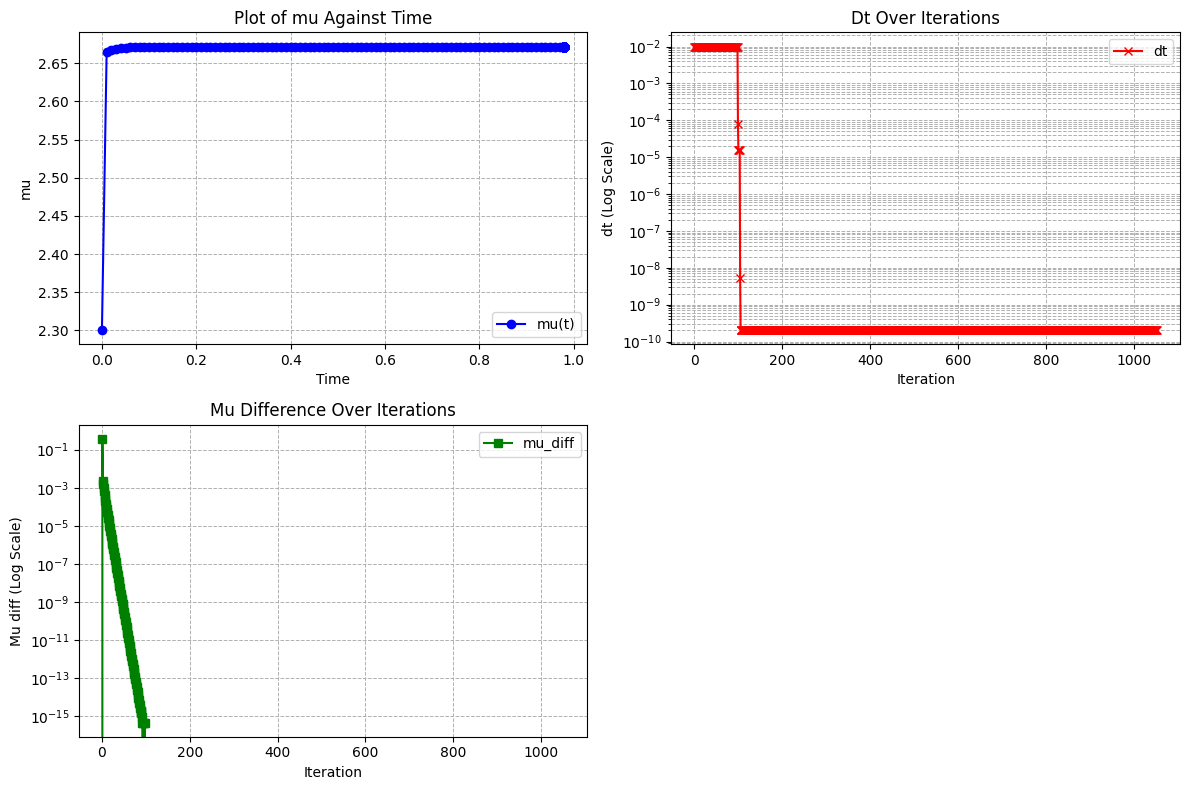

In [3]:
#calc. max-growthrate values for given condition and time
model.compute_gradient_ascent(condition = "3", max_time=400, initial_dt = 0.01,save_f=False)
print(model.f_trajectory)
##calc. max-growthrate values for every condition and given time
#model.compute_optimum_for_all_conditions(max_time = 400, initial_dt = 0.01)

#plot gradient ascent
model.plot_gradient_ascent_trajectory()

#save gradient ascent
#model.save_gradient_ascent_trajectory()


### 3.2) Gradient Ascent (With Noise)

Gradient ascent with noise calculates the local maximum of `mu` (growth rate) and updates every other value of the model, while adding noise to the trajectory. You can set the following parameters for this function:

- **condition**: Sets the environmental condition according to the CSV file.
- **max_time**: Sets the maximum iteration time for the simulation.
- **initial_dt**: Sets the initial change rate for the gradient ascent calculation.

#### 3.2.1) Plotting and Saving Gradient Ascent

To plot and save the gradient ascent with noise, use the following two functions:

- `plot_gradient_ascent_trajectory()`
- `save_gradient_ascent_trajectory()`

> **Note**: As of now, there is no function to compute the optimum for all conditions with noise.


In [4]:
#calc. max-growthrate values for given condition and time
#model.compute_gradient_ascent_with_noise(condition = "3", max_time = 400, initial_dt = 0.01)
#plot gradient ascent
#model.plot_gradient_ascent_trajectory()

#save gradient ascent
##model.save_gradient_ascent_trajectory()

### 3.3) Markov Chain Monte Carlo (MCMC)

MCMC simulates mutations in any random flux fraction or reaction the model has. You can set the following parameters for this function:

- **condition**: Sets the environmental condition according to the CSV file.
- **max_time**: Sets the maximum iteration time for the simulation.


#### 3.3.1) Plotting and Saving MCMC

To plot and save the MCMC trajectory, you can use the following function:

- `plot_MCMC_trajectory()`




c:\Users\Furkan Mert\GBA\GBA_Evolution\./src\GBA_algorithms.py:557: RuntimeWarning: overflow encountered in exp
  return (1-np.exp(-2*selection_coefficient)) / (1-np.exp(-2*N_e*selection_coefficient))


> MCMC simulation was completed. No mutation was fixed
[1.        0.8136254]


IndexError: invalid index to scalar variable.

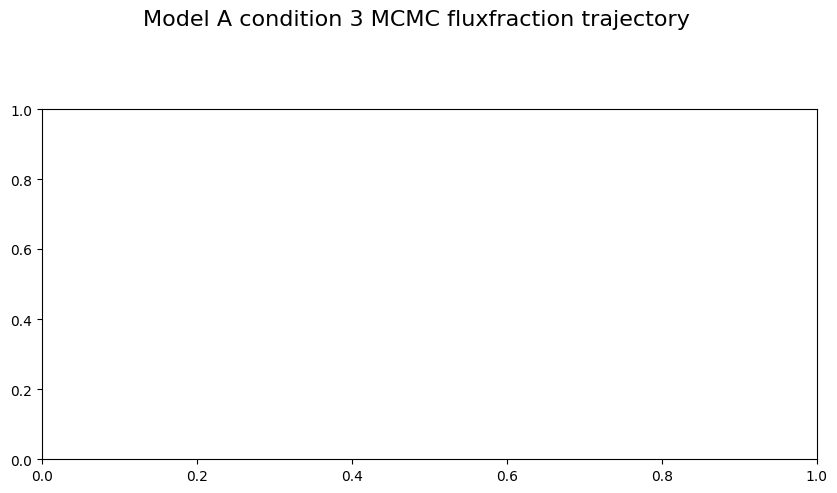

In [5]:
#calc. MCMC 
model.MCMC(condition = "3", max_time=400)
#plot MCMC
model.plot_MCMC_trajectory()